In [1]:
## AUTHOR MIQUÉIAS FERNANDES
## bio@mikeias.net
## 02/21

In [2]:
import pandas as pd
import seaborn as sns

from math import log
from matplotlib import rc
import matplotlib.pyplot as plt

In [3]:
TITLE_SIZE = 20
LABEL_SIZE = 20
NOTE_SIZE = 20
rc('text', usetex=True)

In [4]:
rc = {'lines.linewidth': 2, 
      'axes.labelsize': LABEL_SIZE, 
      'axes.titlesize': TITLE_SIZE, 
      'legend.fontsize': 'x-large',
      'font.family':'lato', 'font.serif':['lato'],
      'axes.facecolor': 'DFDFE5'}
sns.set_context('paper', rc=rc)
sns.set_style('dark', rc=rc)

In [5]:
def importEvents(file, lab, cols=['ID','Gene','FDR', 'PSI', 'Label']):
    data = pd.read_csv(file, delimiter='\t')
    data['Label'] = lab
    data['PSI'] = data['IncLevelDifference']
    data['Gene'] = data['GeneID']
    if not all([c in list(data.columns) for c in cols]): 
        raise Exception('Load Error in ' + file)
    return data.drop(columns=[c for c in data.columns if not c in cols])

In [6]:
def parseFolder(folder):
    a3ss = importEvents(folder + '/A3SS.MATS.JC.txt', 'A3SS')
    a5ss = importEvents(folder + '/A5SS.MATS.JC.txt', 'A5SS')
    ri = importEvents(folder + '/RI.MATS.JC.txt', 'RI')
    se = importEvents(folder + '/SE.MATS.JC.txt', 'SE')
    mxe = importEvents(folder + '/MXE.MATS.JC.txt', 'MXE')
    pd_all_data = pd.concat([a3ss, a5ss,  ri, se ,mxe])
    pd_all_data['qValue'] = pd_all_data.FDR.map(lambda e:  'ALL' if e > 0.05 else 'SIG')
    pd_all_data['log10fdr'] = pd_all_data.FDR.map(lambda e: -log(e, 10))
    return pd_all_data

In [7]:
gy, ry  = '../rmats401/resultadosGY/', '../rmats401/resultadosRY/'

In [8]:
gy_dt, ry_dt = parseFolder(gy), parseFolder(ry)

In [9]:
gy_dt_sig = gy_dt.loc[gy_dt.qValue == 'SIG']

In [10]:
g_sig = gy_dt_sig.loc[gy_dt_sig.PSI < 0]

In [11]:
yg_sig = gy_dt_sig.loc[gy_dt_sig.PSI > 0]

In [12]:
ry_dt_sig = ry_dt.loc[ry_dt.qValue == 'SIG']

In [13]:
r_sig = ry_dt_sig.loc[ry_dt_sig.PSI < 0]

In [14]:
yr_sig = ry_dt_sig.loc[ry_dt_sig.PSI > 0]

In [15]:
y_sig = pd.concat([yg_sig, yr_sig])

In [16]:
len(g_sig), len(y_sig), len(r_sig)

(70, 125, 47)

In [17]:
if not len(gy_dt_sig) + len(ry_dt_sig) == len(g_sig) + len(y_sig) + len(r_sig):
    raise Exception('Deu erro na hora de juntar, verifique!')

In [18]:
dt = []
for c, d in [('G', g_sig), ('Y', y_sig), ('R', r_sig)]:
    for evt in ['RI', 'SE', 'A3SS', 'A5SS', 'MXE']:
        genes = d.loc[d['Label'] == evt, 'Gene'].nunique()
        events = d.loc[d['Label'] == evt, 'ID'].nunique()
        dt.append([c, evt, "Genes", genes])
        dt.append([c, evt, "Events", events])

In [19]:
data = pd.DataFrame(dt, columns=["Condition", "Event", "Distinct count", "Count"])

findfont: Font family ['lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['lato'] not found. Falling back to DejaVu Sans.


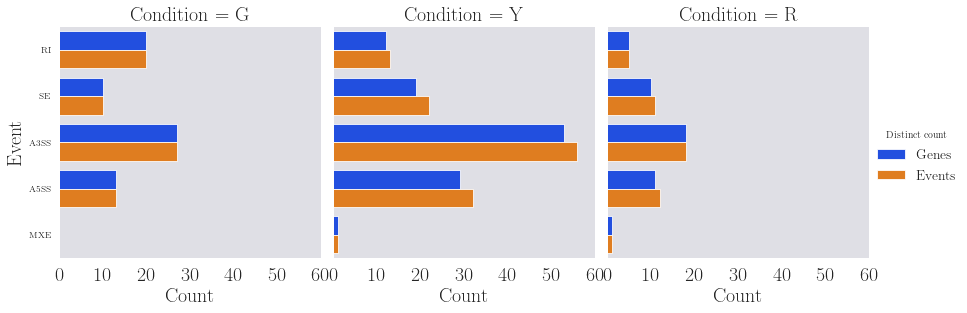

In [20]:
g = sns.catplot(
    x="Count", 
    y="Event",
    hue="Distinct count", 
    col="Condition", 
    data=data, height=4, kind='bar', palette="bright")

g.set_xticklabels(fontsize=20)

In [21]:
g.savefig('bars.as.svg')

In [22]:
dt = []
for c, d in [('GY', gy_dt_sig), ('RY', gy_dt_sig)]:
    for evt in ['RI', 'SE', 'A3SS', 'A5SS', 'MXE']:
        genes = d.loc[d['Label'] == evt, 'Gene'].nunique()
        events = d.loc[d['Label'] == evt, 'ID'].nunique()
        dt.append([c, evt, "Genes", genes])
        dt.append([c, evt, "Events", events])

In [23]:
data = pd.DataFrame(dt, columns=["Condition", "Event", "Distinct count", "Count"])

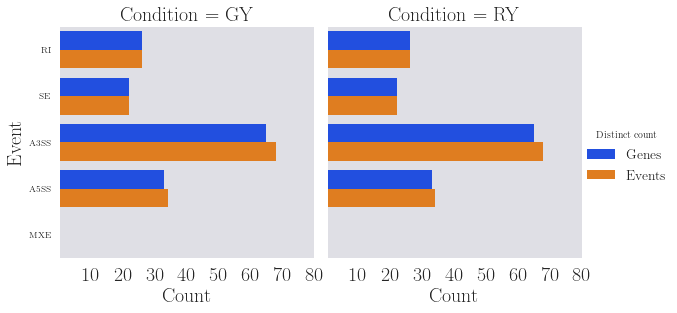

In [24]:
g = sns.catplot(
    x="Count", 
    y="Event",
    hue="Distinct count", 
    col="Condition", 
    data=data, height=4, kind='bar', palette="bright", linewidth=0)
g.set_xticklabels([10*i if i > 0 else "" for i in range(0,9)], fontsize=20)

In [25]:
g.savefig('bars.as.svg')

In [26]:
r_sig['Gene'].nunique()

42

In [27]:
from venn import venn

findfont: Font family ['lato'] not found. Falling back to DejaVu Sans.


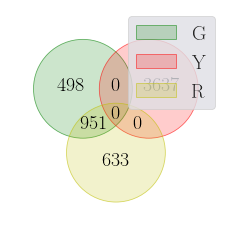

In [28]:
g = venn({
     'G': set(gy_dt.loc[gy_dt.PSI < 0]['Gene']),
    'Y': set(gy_dt.loc[gy_dt.PSI > 0]['Gene'] + ry_dt.loc[ry_dt.PSI > 0]['Gene']),
    'R': set(ry_dt.loc[ry_dt.PSI < 0]['Gene'])},
    figsize=[4,4], fontsize=20, cmap=['g', 'r', 'y'], alpha=.2)
plt.savefig('venn por condicao nao sig.svg')

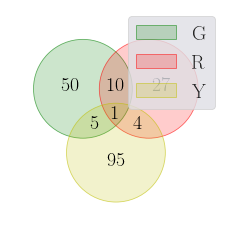

In [29]:
g = venn({
    'G': set(g_sig['Gene']),
    'R': set(r_sig['Gene']),
    'Y': set(y_sig['Gene'])},
    figsize=[4,4], fontsize=20, cmap=['g', 'r', 'y'], alpha=.2)
plt.savefig('venn por condicao sig.svg')

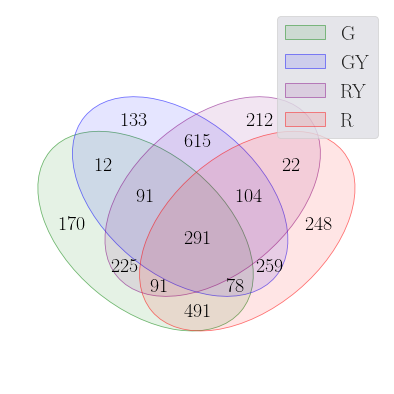

In [30]:
venn({
    'G': set(gy_dt.loc[gy_dt.PSI < 0]['Gene']),
    'GY': set(gy_dt.loc[gy_dt.PSI > 0]['Gene']),
    'RY': set(ry_dt.loc[ry_dt.PSI > 0]['Gene']),
    'R': set(ry_dt.loc[ry_dt.PSI < 0]['Gene'])}, 
    figsize=[7,7], fontsize=20, cmap=['g', 'b', 'purple', 'r'], alpha=.1)
plt.savefig('venn genes nao sig.svg')

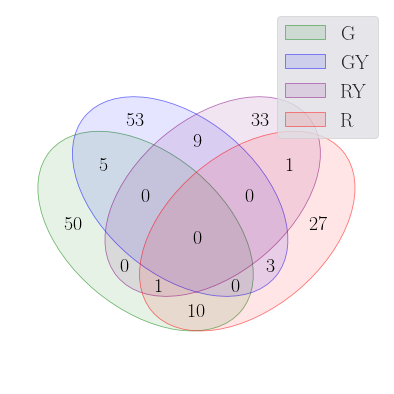

In [31]:
p  = venn({
    'G': set(gy_dt.loc[(gy_dt.PSI < 0) & (gy_dt.qValue == 'SIG')]['Gene']),
    'GY': set(gy_dt.loc[(gy_dt.PSI > 0) & (gy_dt.qValue == 'SIG')]['Gene']),
    'RY': set(ry_dt.loc[(ry_dt.PSI > 0) & (ry_dt.qValue == 'SIG')]['Gene']),
    'R': set(ry_dt.loc[(ry_dt.PSI < 0) & (ry_dt.qValue == 'SIG')]['Gene'])}, 
    figsize=[7,7], fontsize=20, cmap=['g', 'b', 'purple', 'r'], alpha=.1)
plt.savefig('venn genes sig.svg')

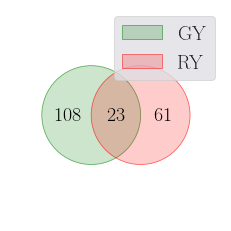

In [32]:
g = venn({
    'GY': set(gy_dt.loc[gy_dt.qValue == 'SIG']['Gene']),
    'RY': set(ry_dt.loc[ry_dt.qValue == 'SIG']['Gene'])
},
    figsize=[4,4], fontsize=20, cmap=['g', 'r'], alpha=.2)
plt.savefig('venn por comparacao sig.svg')

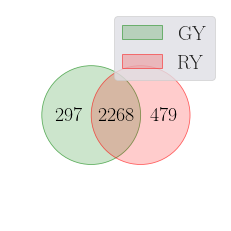

In [33]:
g = venn({
    'GY': set(gy_dt['Gene']),
    'RY': set(ry_dt['Gene'])
},
    figsize=[4,4], fontsize=20, cmap=['g', 'r'], alpha=.2)
plt.savefig('venn por comparacao nao sig.svg')

In [34]:
mapped = pd.read_csv('../../2 - mapping/gene_reads_count/gene_counts.tsv', delimiter='\t')

In [35]:
genes_g = set(mapped['gene'].loc[
    (mapped['bams//ER35_Aligned.sortedByCoord.out.bam'] > 0) &
    (mapped['bams//ER36_Aligned.sortedByCoord.out.bam'] > 0) &
    (mapped['bams//ER37_Aligned.sortedByCoord.out.bam'] > 0)
])

In [36]:
genes_y = set(mapped['gene'].loc[
    (mapped['bams//ER38_Aligned.sortedByCoord.out.bam'] > 0) &
    (mapped['bams//ER39_Aligned.sortedByCoord.out.bam'] > 0) &
    (mapped['bams//ER40_Aligned.sortedByCoord.out.bam'] > 0)
])

In [37]:
genes_r = set(mapped['gene'].loc[
    (mapped['bams//ER41_Aligned.sortedByCoord.out.bam'] > 0) &
    (mapped['bams//ER42_Aligned.sortedByCoord.out.bam'] > 0) &
    (mapped['bams//ER43_Aligned.sortedByCoord.out.bam'] > 0)
])

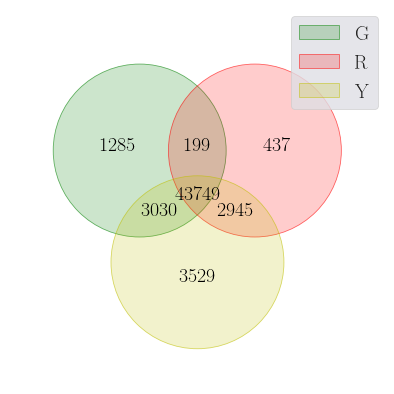

In [38]:
g = venn({
    'G': genes_g,
    'R': genes_r,
    'Y': genes_y},
    figsize=[7,7], fontsize=20, cmap=['g', 'r', 'y'], alpha=.2)
plt.savefig('venn mapped genes.svg')